In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import seaborn as sns


In [185]:
dataset = pd.read_csv("bike_sharing.csv")
dataset = dataset.drop(columns=['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 
                                'weekday','workingday', 'weathersit','atemp', 'hum', 'windspeed', 
                                'casual', 'registered'], axis=1)
dataset.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [186]:
# sns.distplot(dataset.cnt)
dataset.columns

Index(['temp', 'cnt'], dtype='object')

Skewness is -0.2794706917752847


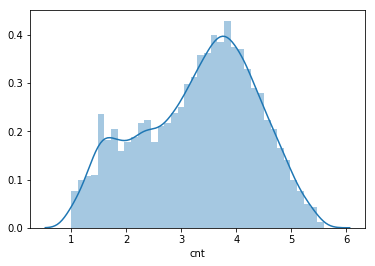

In [187]:
# now transforming feature variable
# dataset = pd.read_csv("bike_sharing.csv")
dataset.cnt = (np.sqrt(np.sqrt(dataset.cnt)))
print ('Skewness is', dataset.cnt.skew())
sns.distplot(dataset.cnt)


In [188]:
print("Mean is", dataset['temp'].mean(), ", Median is ", dataset['temp'].median(), dataset['temp'].skew())

Mean is 0.4969871684216586 , Median is  0.5 -0.00602088334827027


{'whiskers': [<matplotlib.lines.Line2D at 0x7f63cf1a6898>,
 'caps': [<matplotlib.lines.Line2D at 0x7f63cf1b0198>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f63cf1a6748>],
 'medians': [<matplotlib.lines.Line2D at 0x7f63cf1b09e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f63cf1b0e10>],
 'means': []}

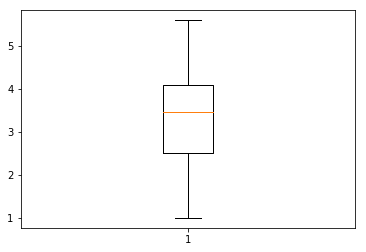

In [189]:
plt.boxplot(dataset.cnt)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f63cf17d400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f63cf17dcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f63cf17d2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f63cf187550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f63cf187978>],
 'means': []}

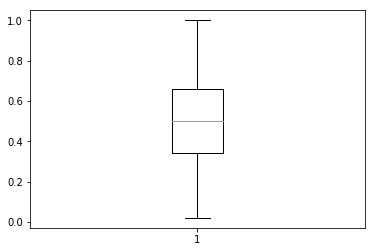

In [190]:
plt.boxplot(dataset.temp)

In [191]:
# Split the dataset into features and labels
x_dataset = pd.DataFrame(dataset.temp)
y_dataset = pd.DataFrame(dataset.cnt)

# Split the data into train and test sets
x_train_data, x_test_data, y_train_data, y_test_data = \
            train_test_split(x_dataset, y_dataset, test_size=0.25, random_state = 42)

# Import linear regression class
regression = LinearRegression()
regression.fit(x_train_data, y_train_data)

y_pred_test = regression.predict(x_test_data)
y_pred_train = regression.predict(x_train_data)

In [192]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test_data,y_pred_test)))

print("Test EVS: ", explained_variance_score(y_test_data, y_pred_test), 
      "Train EVS: ", explained_variance_score(y_train_data, y_pred_train))

print("accuracy test: ", accuracy(np.array(y_test_data), y_pred_test))
print("accuracy train: ", accuracy(np.array(y_train_data), y_pred_train))

r_score_test = r2_score(y_test_data,y_pred_test) 
r_score_train = r2_score(y_train_data, y_pred_train) 

print("r_score_test : ",r_score_test)
print("r_score_train : ",r_score_train)
def accuracy( y_data_test, y_pred_test):

    total_error = 0
    for i in range(0, len(y_data_test)):
        total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
    total_error = (total_error / len(y_data_test))
    accuracy = 1 - total_error
    return accuracy * 100


0.9445557417420485
Test EVS:  0.16755549434490713 Train EVS:  0.16934143762526388
accuracy test:  [69.4679927]
accuracy train:  [69.13265674]
r_score_test :  0.16754223979873661
r_score_train :  0.169341437625264


In [193]:
r_score_test = r2_score(y_test_data,y_pred_test) * 100
r_score_train = r2_score(y_train_data, y_pred_train) * 100
print("r_score_test : ",r_score_test)

print("r_score_train : ",r_score_train)

r_score_test :  16.75422397987366
r_score_train :  16.9341437625264


In [194]:
dataset.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,3.304634
std,0.192556,1.046571
min,0.020000,1.000000
25%,0.340000,2.514867
50%,0.500000,3.452010
75%,0.660000,4.094271
max,1.000000,5.590796


In [195]:
def graphs(x_train_data, y_train_data, x_test_data, y_test_data, y_pred_test, y_pred_train):
    plt.scatter(x_train_data, y_train_data, color = "blue")
    plt.plot(x_train_data, y_pred_train, color = "red")
    plt.title("Regression Line for train data set")
    plt.xlabel("x_train_data")
    plt.ylabel("y_train_data")
    plt.legend
    plt.show()
    
    plt.scatter(x_test_data, y_test_data, color = "blue")
    plt.plot(x_test_data, y_pred_test, color = "purple")
    plt.title("Regression Line for test data set")
    plt.xlabel("x_test_data")
    plt.ylabel("y_pred_test")
    plt.show()

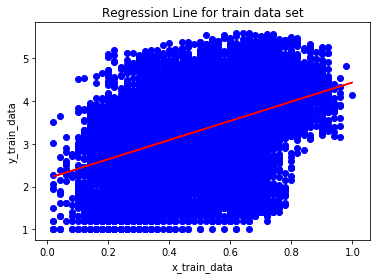

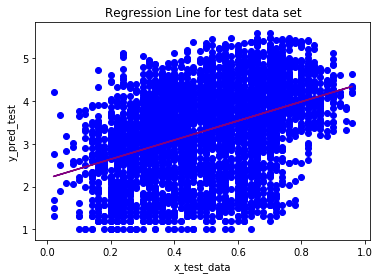

In [196]:
graphs(x_train_data, y_train_data, x_test_data, y_test_data, y_pred_test, y_pred_train)

In [132]:
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import random

# def fun(x, y):
#     return x**2 + y

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# X = 

# ax.plot_surface(X, Y, Z)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')